In [28]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [29]:
from fastai import *        # Quick access to most common functionality
from fastai.text import *   # Quick access to NLP functionality
from pathlib import Path
from fastai.vision import *

epochs = 20

In [30]:
accuracy_list = []

In [31]:
path_clas = Path('/home/ubuntu/data/autopsy')
path_lm = Path('/home/ubuntu/data/autopsy')

batch_size=32
drop_mult=0.1
learning_rate=1e-4
wd=1e-4
num_folds = 5

folds = ['data_suicide_homicide_k_1.csv','data_suicide_homicide_k_2.csv','data_suicide_homicide_k_3.csv','data_suicide_homicide_k_4.csv','data_suicide_homicide_k_5.csv']


In [32]:
data_lm = TextLMDataBunch.from_csv(path_lm, 'data_suicide_homicide_combined_train_test.csv', classes=['Suicide','Homicide'])

In [33]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[0], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_autopsy_pretrained')

learn.freeze()

In [34]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


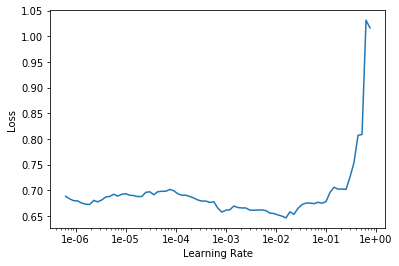

In [35]:
learn.recorder.plot()

In [36]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:28
epoch  train_loss  valid_loss  accuracy
1      0.651982    0.579373    0.729469  (00:06)
2      0.612612    0.509941    0.787440  (00:07)
3      0.629087    0.493629    0.821256  (00:06)
4      0.562194    0.466008    0.801932  (00:08)



In [37]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 05:46
epoch  train_loss  valid_loss  accuracy
1      0.541883    0.524341    0.758454  (00:18)
2      0.566183    0.490117    0.816425  (00:15)
3      0.544377    0.488884    0.792271  (00:15)
4      0.505117    0.486766    0.792271  (00:17)
5      0.516301    0.482705    0.816425  (00:15)
6      0.468911    0.450599    0.821256  (00:18)
7      0.449802    0.468706    0.826087  (00:18)
8      0.462994    0.403404    0.864734  (00:15)
9      0.461926    0.364046    0.874396  (00:15)
10     0.444038    0.370405    0.855072  (00:15)
11     0.378668    0.366236    0.859903  (00:19)
12     0.375997    0.341091    0.879227  (00:16)
13     0.358009    0.360560    0.874396  (00:16)
14     0.355372    0.361539    0.859903  (00:16)
15     0.303155    0.311161    0.884058  (00:20)
16     0.300989    0.335910    0.869565  (00:17)
17     0.305589    0.276463    0.898551  (00:19)
18     0.288632    0.363635    0.855072  (00:18)
19     0.277374    0.284481    0.903382  (00:20)
20     0.31

In [38]:
learn.validate()

[0.30151767, tensor(0.8792)]

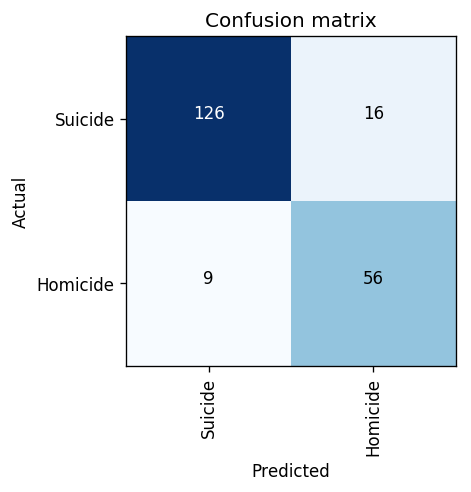

In [39]:
accuracy_list.append(learn.validate()[1].item())
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

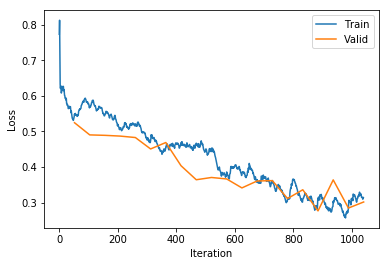

In [40]:
learn.recorder.plot_losses()

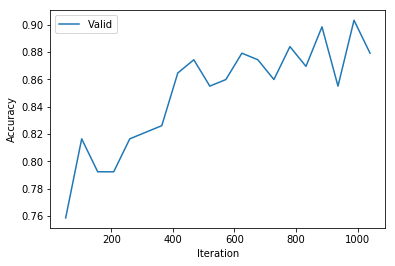

In [41]:
learn.recorder.plot_metrics()

In [42]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[1], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_autopsy_pretrained')

learn.freeze()

In [43]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


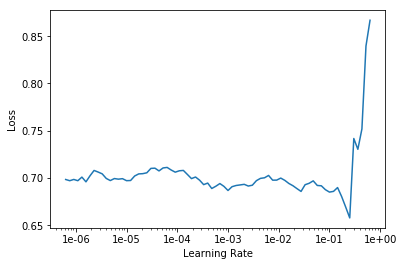

In [44]:
learn.recorder.plot()

In [45]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:28
epoch  train_loss  valid_loss  accuracy
1      0.666627    0.592538    0.719807  (00:06)
2      0.624795    0.599739    0.695652  (00:07)
3      0.587550    0.577111    0.710145  (00:07)
4      0.607155    0.552703    0.758454  (00:06)



In [46]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 05:53
epoch  train_loss  valid_loss  accuracy
1      0.573076    0.536234    0.772947  (00:18)
2      0.559379    0.557387    0.782609  (00:18)
3      0.541486    0.559998    0.743961  (00:18)
4      0.504068    0.510288    0.797101  (00:19)
5      0.467970    0.506213    0.797101  (00:19)
6      0.486863    0.468332    0.821256  (00:16)
7      0.501126    0.504447    0.777778  (00:15)
8      0.439065    0.469631    0.811594  (00:18)
9      0.466036    0.424757    0.830918  (00:15)
10     0.419281    0.416921    0.840580  (00:17)
11     0.423372    0.385893    0.855072  (00:15)
12     0.413236    0.366782    0.850242  (00:17)
13     0.399218    0.350187    0.879227  (00:15)
14     0.389697    0.389039    0.850242  (00:16)
15     0.335020    0.374349    0.850242  (00:18)
16     0.326283    0.351639    0.855072  (00:17)
17     0.317421    0.335689    0.874396  (00:17)
18     0.303516    0.314050    0.893720  (00:16)
19     0.258989    0.322349    0.884058  (00:19)
20     0.24

In [47]:
learn.validate()

[0.3060135, tensor(0.8986)]

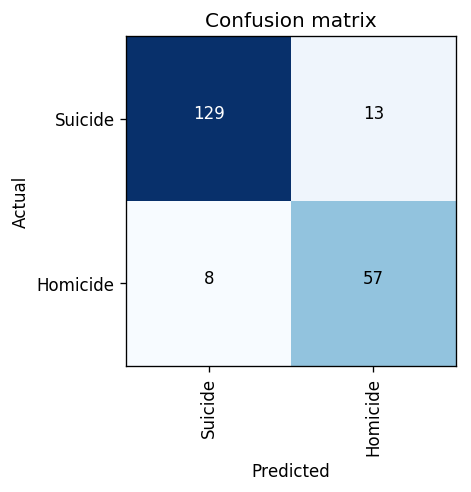

In [48]:
accuracy_list.append(learn.validate()[1].item())
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

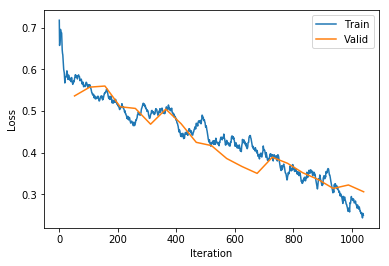

In [49]:
learn.recorder.plot_losses()

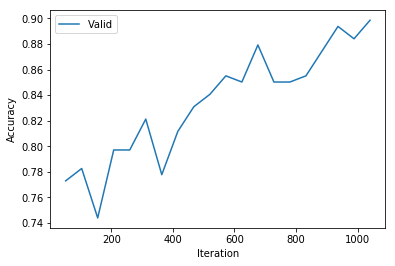

In [50]:
learn.recorder.plot_metrics()

In [51]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[2], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_autopsy_pretrained')

learn.freeze()

In [52]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


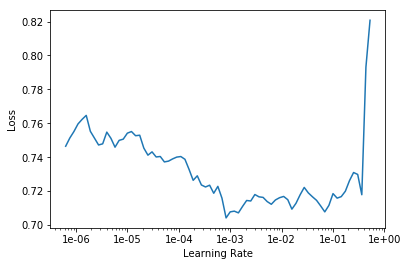

In [53]:
learn.recorder.plot()

In [54]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:26
epoch  train_loss  valid_loss  accuracy
1      0.721646    0.621836    0.695652  (00:06)
2      0.678024    0.579957    0.700483  (00:07)
3      0.673590    0.536888    0.763285  (00:06)
4      0.631014    0.600325    0.681159  (00:07)



In [55]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 05:54
epoch  train_loss  valid_loss  accuracy
1      0.642016    0.556157    0.753623  (00:15)
2      0.612720    0.508276    0.777778  (00:16)
3      0.567699    0.546270    0.743961  (00:18)
4      0.513153    0.480611    0.826087  (00:20)
5      0.541626    0.492266    0.821256  (00:15)
6      0.507200    0.438243    0.811594  (00:17)
7      0.481015    0.432153    0.845411  (00:16)
8      0.425789    0.480179    0.811594  (00:19)
9      0.442326    0.402638    0.864734  (00:16)
10     0.389753    0.376067    0.855072  (00:19)
11     0.397698    0.407711    0.840580  (00:17)
12     0.425122    0.411794    0.840580  (00:15)
13     0.404155    0.338419    0.864734  (00:16)
14     0.371037    0.333191    0.884058  (00:20)
15     0.327104    0.366680    0.869565  (00:18)
16     0.323114    0.428954    0.835749  (00:18)
17     0.326165    0.378112    0.840580  (00:16)
18     0.303233    0.305539    0.888889  (00:20)
19     0.335952    0.313726    0.884058  (00:15)
20     0.29

In [56]:
learn.validate()

[0.34619656, tensor(0.8696)]

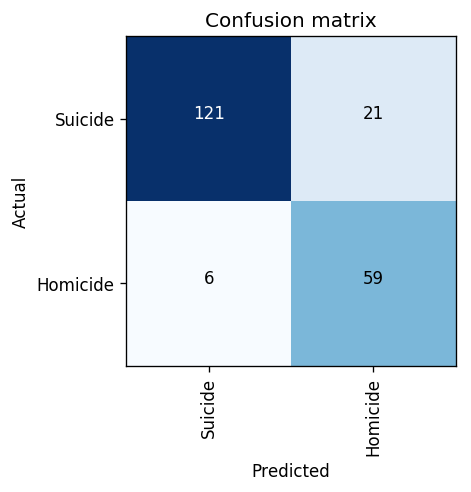

In [57]:
accuracy_list.append(learn.validate()[1].item())
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

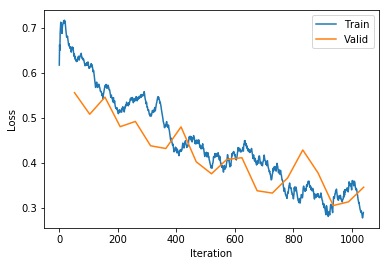

In [58]:
learn.recorder.plot_losses()

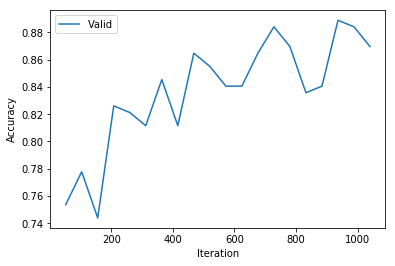

In [59]:
learn.recorder.plot_metrics()

In [60]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[3], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_autopsy_pretrained')

learn.freeze()

In [61]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


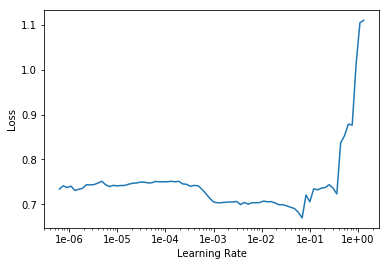

In [62]:
learn.recorder.plot()

In [63]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:27
epoch  train_loss  valid_loss  accuracy
1      0.697827    0.648101    0.642512  (00:06)
2      0.660937    0.580253    0.753623  (00:06)
3      0.649595    0.588951    0.743961  (00:06)
4      0.602952    0.606019    0.710145  (00:07)



In [64]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 05:49
epoch  train_loss  valid_loss  accuracy
1      0.621791    0.595132    0.705314  (00:16)
2      0.602784    0.539761    0.772947  (00:15)
3      0.586164    0.523131    0.753623  (00:14)
4      0.550199    0.579369    0.724638  (00:17)
5      0.486652    0.498511    0.787440  (00:20)
6      0.499287    0.633219    0.623188  (00:16)
7      0.470818    0.482453    0.801932  (00:16)
8      0.446600    0.482892    0.811594  (00:18)
9      0.459270    0.431487    0.835749  (00:15)
10     0.433068    0.479905    0.806763  (00:18)
11     0.413415    0.426957    0.850242  (00:16)
12     0.377270    0.380757    0.864734  (00:17)
13     0.324317    0.359360    0.884058  (00:19)
14     0.341486    0.339016    0.898551  (00:17)
15     0.346681    0.443693    0.806763  (00:16)
16     0.320627    0.313241    0.893720  (00:18)
17     0.292134    0.333130    0.879227  (00:20)
18     0.304101    0.312857    0.888889  (00:17)
19     0.293278    0.357424    0.869565  (00:18)
20     0.29

In [65]:
learn.validate()

[0.295553, tensor(0.9034)]

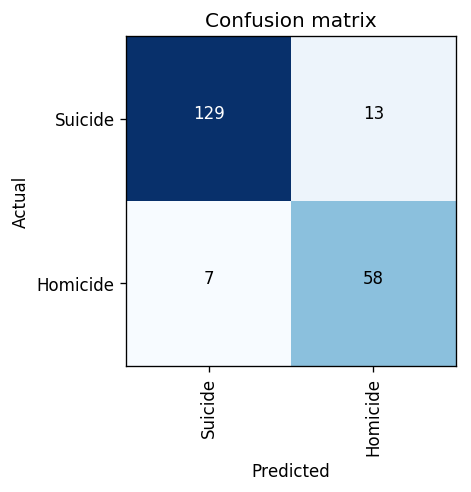

In [66]:
accuracy_list.append(learn.validate()[1].item())
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

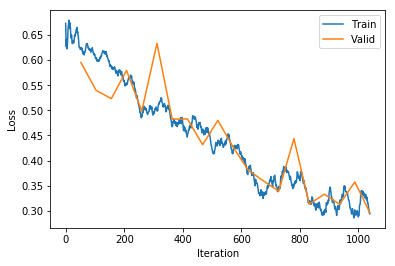

In [67]:
learn.recorder.plot_losses()

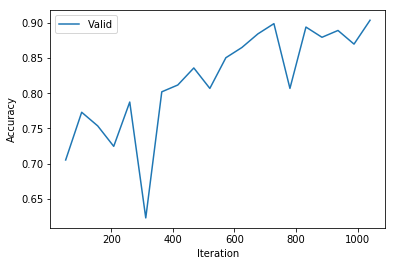

In [68]:
learn.recorder.plot_metrics()

In [69]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[4], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_autopsy_pretrained')

learn.freeze()

In [70]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


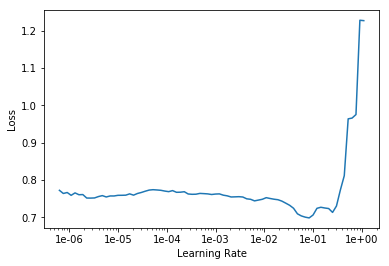

In [71]:
learn.recorder.plot()

In [72]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:28
epoch  train_loss  valid_loss  accuracy
1      0.698880    0.600913    0.705314  (00:07)
2      0.676082    0.597869    0.719807  (00:06)
3      0.640882    0.547139    0.787440  (00:07)
4      0.616618    0.591786    0.724638  (00:06)



In [73]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 05:55
epoch  train_loss  valid_loss  accuracy
1      0.587098    0.583024    0.729469  (00:18)
2      0.556703    0.517118    0.830918  (00:19)
3      0.563362    0.560502    0.743961  (00:17)
4      0.539325    0.467025    0.801932  (00:17)
5      0.517911    0.489961    0.801932  (00:19)
6      0.521795    0.474215    0.806763  (00:16)
7      0.489754    0.492570    0.806763  (00:15)
8      0.460907    0.403094    0.826087  (00:18)
9      0.414815    0.484095    0.801932  (00:19)
10     0.405878    0.356135    0.864734  (00:18)
11     0.397905    0.396174    0.845411  (00:17)
12     0.405161    0.333623    0.884058  (00:16)
13     0.400959    0.361608    0.874396  (00:15)
14     0.390459    0.393704    0.874396  (00:17)
15     0.403608    0.361865    0.874396  (00:15)
16     0.374158    0.409623    0.840580  (00:18)
17     0.331655    0.333774    0.879227  (00:17)
18     0.301583    0.298592    0.884058  (00:19)
19     0.286847    0.307329    0.869565  (00:17)
20     0.29

In [74]:
learn.validate()

[0.33795854, tensor(0.8792)]

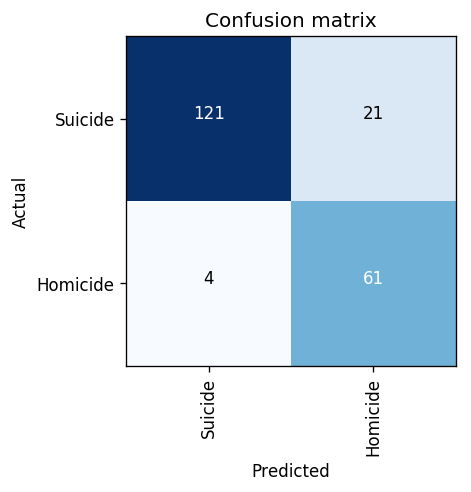

In [75]:
accuracy_list.append(learn.validate()[1].item())
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

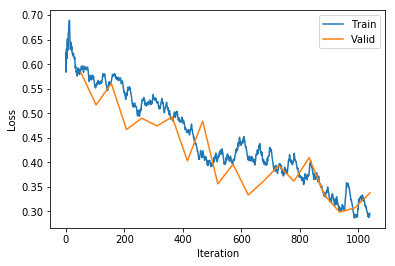

In [76]:
learn.recorder.plot_losses()

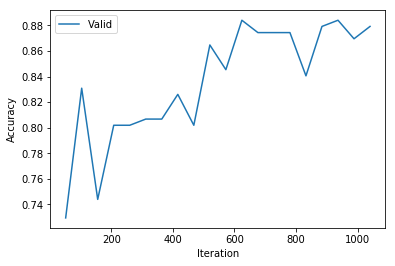

In [77]:
learn.recorder.plot_metrics()

In [78]:
print(accuracy_list)

[0.8792270421981812, 0.8985507488250732, 0.8695651888847351, 0.9033816456794739, 0.8792270421981812]


In [79]:
print(sum(accuracy_list)/len(accuracy_list))

0.8859903335571289


In [80]:
#We are now done doing 5-fold cross validation 

In [81]:
#Now train with all the training data and evaluate with the test data

In [82]:
#data_lm = TextLMDataBunch.from_csv(path_lm, 'data_suicide_homicide_combined_train_test.csv',classes=['Suicide','Homicide'])

In [83]:
data_clas = TextClasDataBunch.from_csv(path_clas,'data_suicide_homicide_combined_train_test.csv', vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_autopsy_pretrained')

learn.freeze()


In [84]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:33
epoch  train_loss  valid_loss  accuracy
1      0.639649    0.557921    0.667954  (00:08)
2      0.609761    0.510291    0.806950  (00:08)
3      0.635817    0.478867    0.806950  (00:07)
4      0.596794    0.505071    0.810811  (00:08)



In [85]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 07:19
epoch  train_loss  valid_loss  accuracy
1      0.545498    0.476386    0.818533  (00:24)
2      0.493434    0.516046    0.779923  (00:24)
3      0.532084    0.414535    0.861004  (00:19)
4      0.485457    0.427304    0.833977  (00:23)
5      0.438654    0.424170    0.861004  (00:24)
6      0.430399    0.401761    0.857143  (00:22)
7      0.428039    0.343441    0.891892  (00:21)
8      0.431297    0.320406    0.903475  (00:20)
9      0.414605    0.320906    0.891892  (00:20)
10     0.431675    0.272265    0.899614  (00:19)
11     0.406166    0.287134    0.903475  (00:19)
12     0.334597    0.330714    0.876448  (00:23)
13     0.371405    0.284140    0.891892  (00:19)
14     0.299201    0.280278    0.880309  (00:22)
15     0.255497    0.268101    0.888031  (00:25)
16     0.258022    0.252788    0.907336  (00:23)
17     0.292144    0.315762    0.864865  (00:21)
18     0.303511    0.285779    0.884170  (00:20)
19     0.295140    0.304241    0.864865  (00:20)
20     0.30

In [86]:
learn.validate()

[0.20940615, tensor(0.9266)]

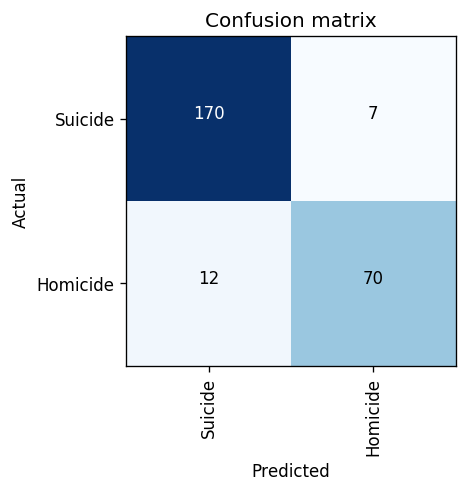

In [87]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

In [88]:
import torch

torch.cuda.empty_cache()